# Prodigy Infotech Data Science Internship 

## Task 2

Build a decision tree classifier to predict whether a customer will purchase a product or service based on their demographic and behavioral data. Use a dataset such as the Bank Marketing dataset from the UCI Machine Learning Repository.



### 1. Import Libraries and Load Dataset

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline


In [4]:
# Load the dataset
df= pd.read_csv('bank-additional-full.csv',delimiter=';')

# Rename target column 'y' to 'deposit' for clarity
df.rename(columns={'y': 'deposit'}, inplace=True)
df.head()


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,deposit
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


### 2. Explore the Data

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [6]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [7]:
# Check for duplicates and missing values
print(f"Duplicates: {df.duplicated().sum()}")
print(f"Missing values:\n{df.isna().sum()}")

Duplicates: 12
Missing values:
age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
deposit           0
dtype: int64


In [8]:
# Data types
print(f"Data Types:\n{df.dtypes.value_counts()}")

Data Types:
object     11
int64       5
float64     5
dtype: int64


In [9]:
# Checking categorical and numerical columns
cat_cols = df.select_dtypes(include='object').columns
num_cols = df.select_dtypes(exclude='object').columns
print(f"Categorical Columns: {cat_cols}")
print(f"Numerical Columns: {num_cols}")

Categorical Columns: Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome', 'deposit'],
      dtype='object')
Numerical Columns: Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed'],
      dtype='object')


### 3. Data Visualization

##### Visualizing Categorical Variables

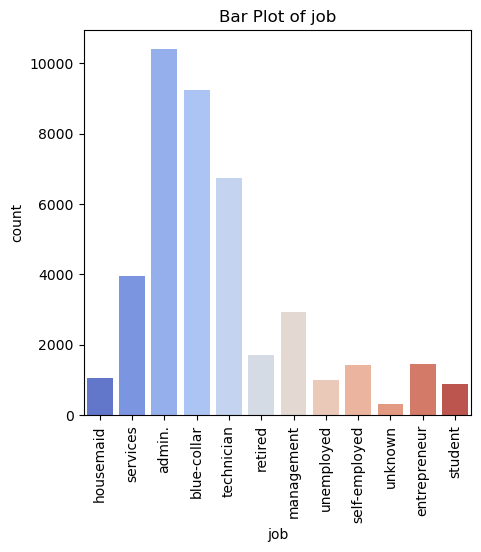

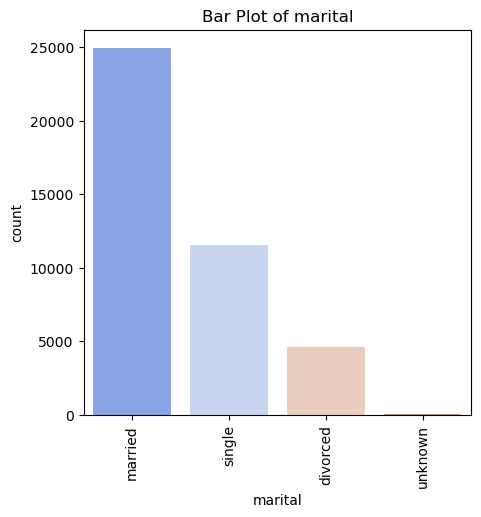

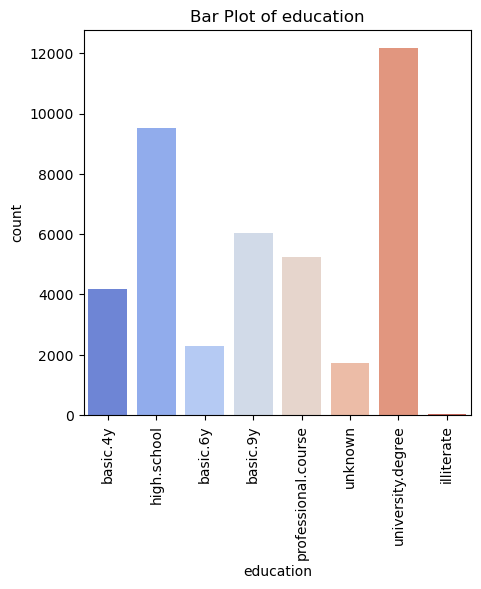

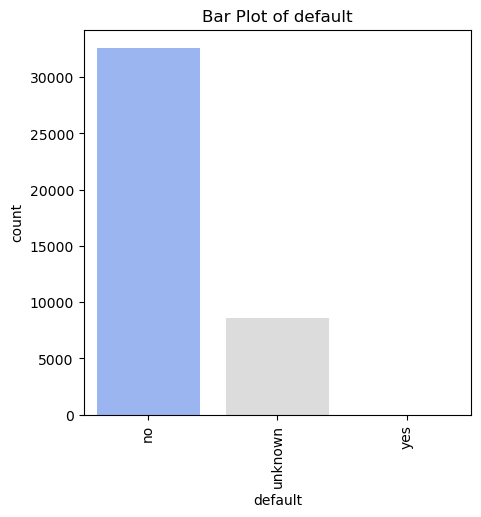

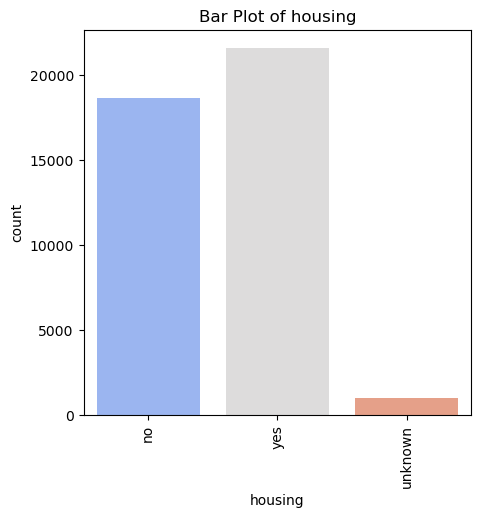

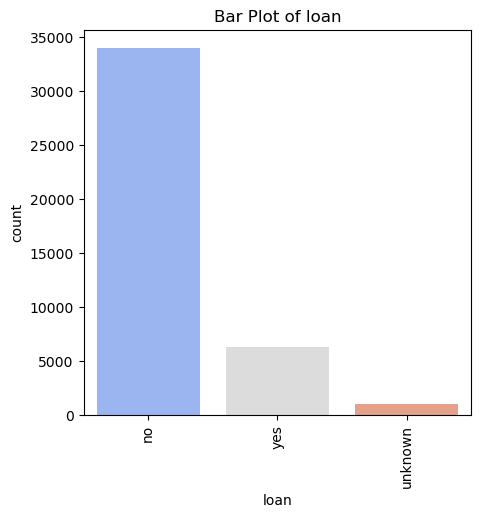

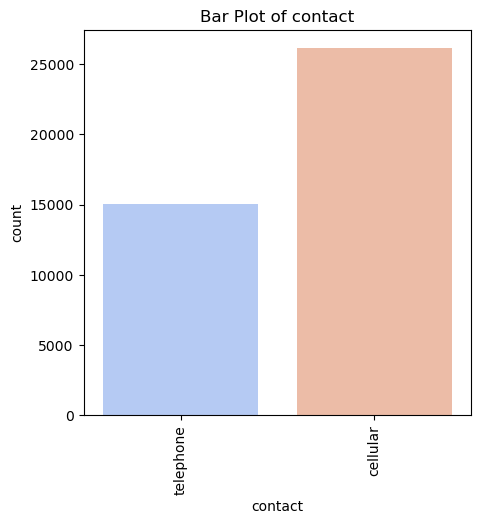

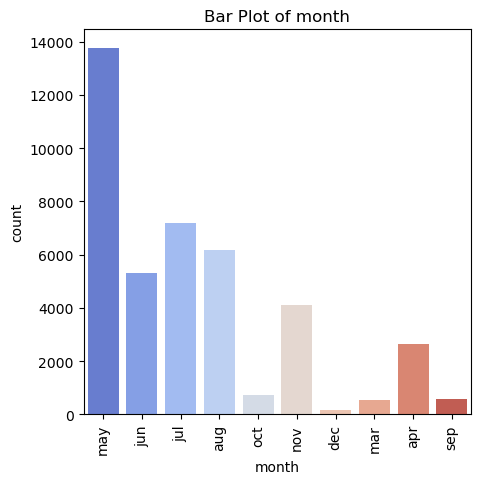

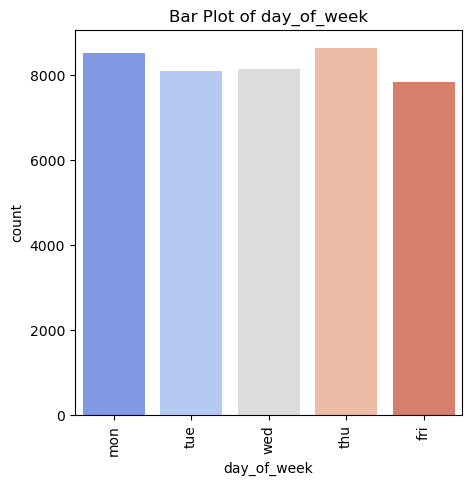

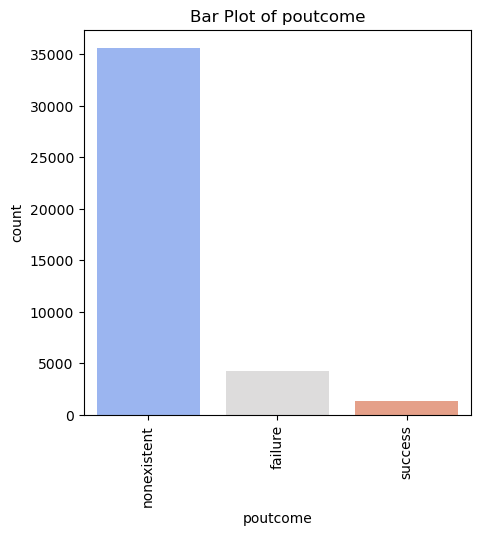

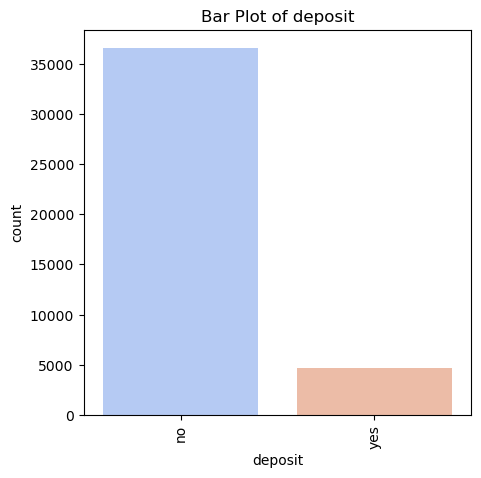

In [10]:
# Plot categorical features
for feature in cat_cols:
    plt.figure(figsize=(5,5))
    sns.countplot(x=feature, data=df, palette='coolwarm')
    plt.title(f'Bar Plot of {feature}')
    plt.xticks(rotation=90)
    plt.show()


##### Visualizing Numeric Variables

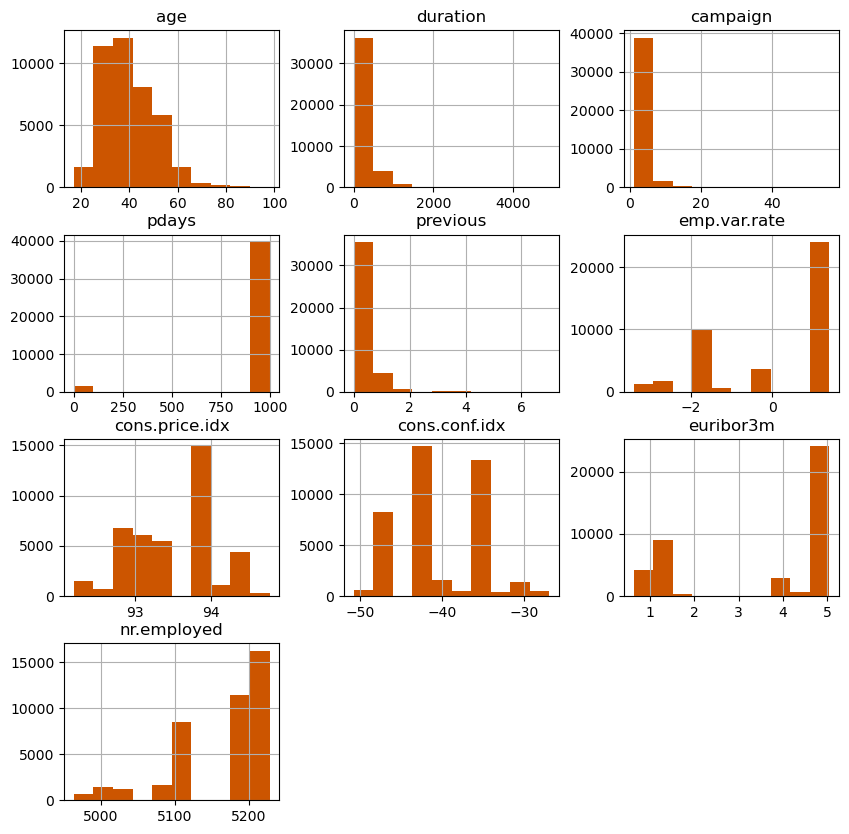

In [11]:
# Histograms for numeric columns
df.hist(figsize=(10,10), color='#cc5500')
plt.show()


### 4. Checking for Outliers

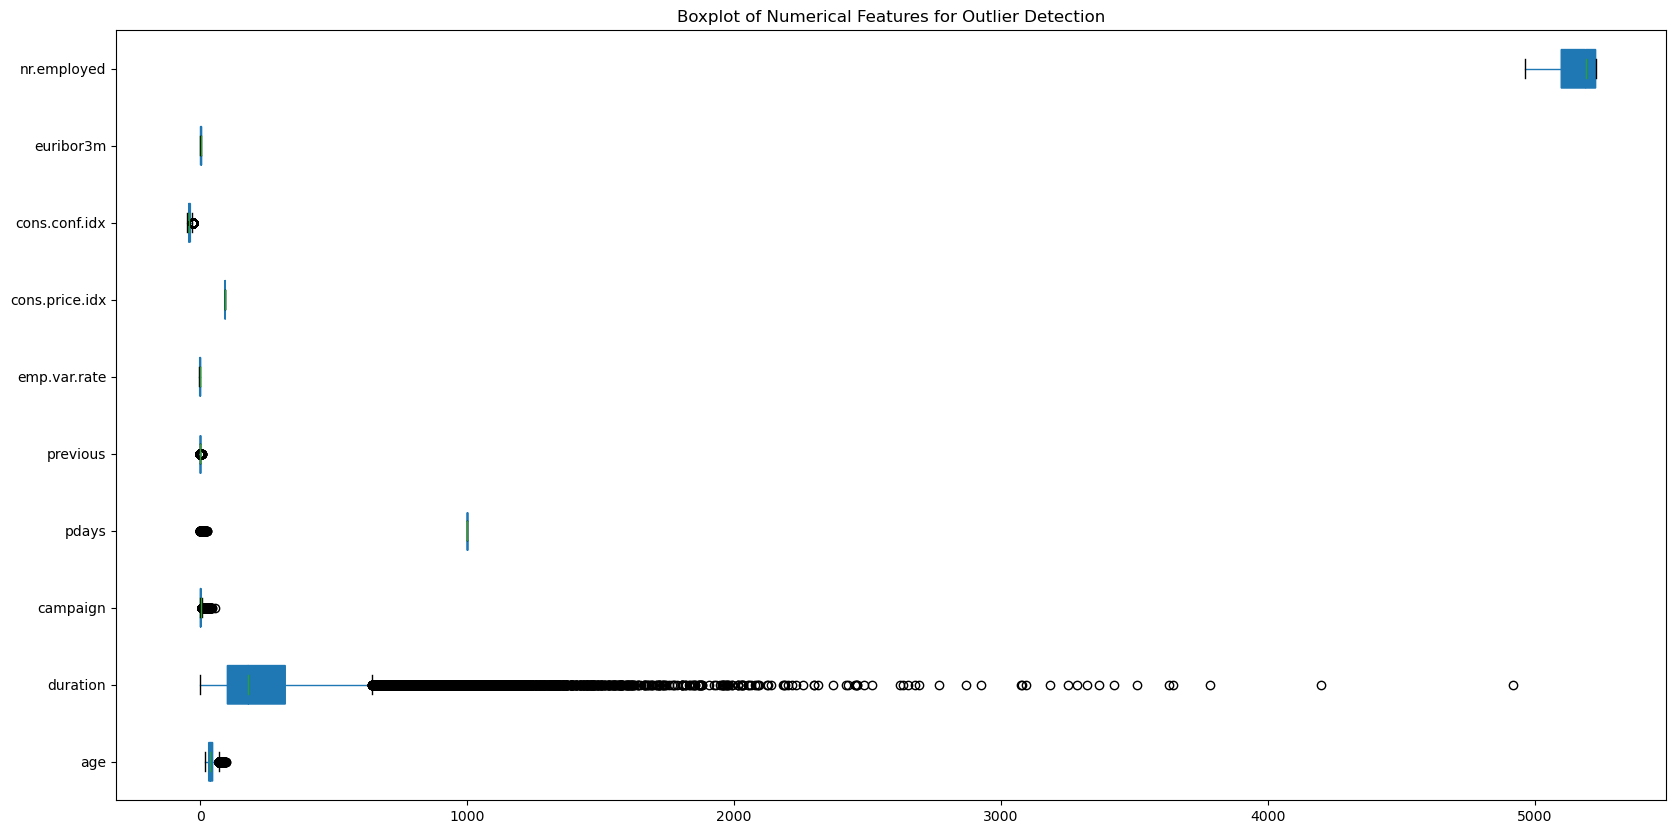

In [12]:
# Visualizing numerical columns using boxplots to identify outliers
num_cols = df.select_dtypes(exclude='object').columns

plt.figure(figsize=(20, 10))
df[num_cols].boxplot(patch_artist=True, notch=True, grid=False, vert=False)
plt.title('Boxplot of Numerical Features for Outlier Detection')
plt.show()


### 5. Handling Outliers Using IQR Method

In [13]:
# Handling outliers in selected numerical columns using IQR
columns_to_check = ['age', 'campaign', 'duration']  # Select columns for outlier removal

for col in columns_to_check:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    
    # Filtering the data to remove outliers
    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    
    print(f"Removed outliers from {col}, new shape: {df.shape}")


Removed outliers from age, new shape: (40719, 21)
Removed outliers from campaign, new shape: (38327, 21)
Removed outliers from duration, new shape: (35561, 21)


In [14]:
# Capping outliers in selected numerical columns
for col in columns_to_check:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    
    # Capping outliers
    df[col] = np.where(df[col] < lower_bound, lower_bound, df[col])
    df[col] = np.where(df[col] > upper_bound, upper_bound, df[col])
    
    print(f"Capped outliers for {col}")


Capped outliers for age
Capped outliers for campaign
Capped outliers for duration


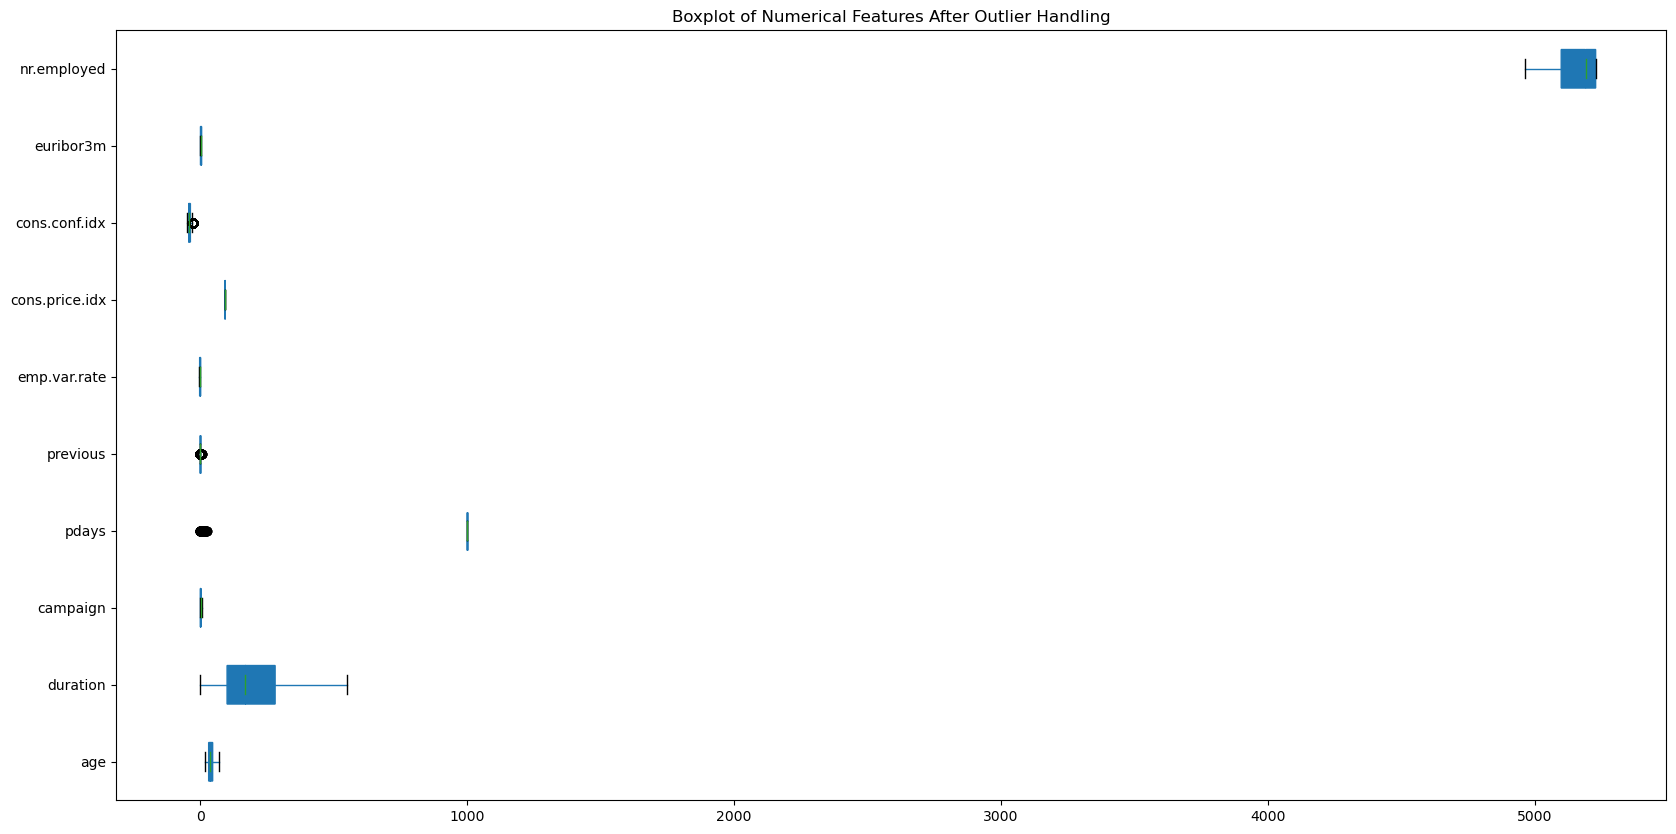

In [15]:
# Visualize the boxplot after handling outliers
plt.figure(figsize=(20, 10))
df[num_cols].boxplot(patch_artist=True, notch=True, grid=False, vert=False)
plt.title('Boxplot of Numerical Features After Outlier Handling')
plt.show()


### 7. Preprocess the Data

In [17]:
# Label encoding categorical columns
label_enc = LabelEncoder()

for col in cat_cols:
    df[col] = label_enc.fit_transform(df[col])

# Encoding the target column 'deposit'
df['deposit'] = label_enc.fit_transform(df['deposit'])


### 8. Split Data into Training and Testing Sets

In [18]:
# Split the data into features (X) and target (y)
X = df.drop('deposit', axis=1)  # Features
y = df['deposit']               # Target

# Split the dataset into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

print(f"Training set shape: {X_train.shape}")
print(f"Test set shape: {X_test.shape}")


Training set shape: (26670, 20)
Test set shape: (8891, 20)


### 9. Build and Train the Decision Tree Classifier

In [19]:
# Initialize and train the Decision Tree Classifier (using Gini)
dt = DecisionTreeClassifier(criterion='gini', max_depth=5, min_samples_split=10, random_state=42)
dt.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=5, min_samples_split=10, random_state=42)

### 10. Evaluate the Model

In [20]:
def evaluate_model(model, X_train, X_test, y_train, y_test):
    # Training and Testing Scores
    train_score = model.score(X_train, y_train)
    test_score = model.score(X_test, y_test)
    print(f"Training Score: {train_score}")
    print(f"Testing Score: {test_score}")

    # Predictions
    y_pred = model.predict(X_test)

    # Accuracy, Confusion Matrix, Classification Report
    print("\nAccuracy Score:", accuracy_score(y_test, y_pred))
    print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("\nClassification Report:\n", classification_report(y_test, y_pred))

evaluate_model(dt, X_train, X_test, y_train, y_test)


Training Score: 0.9392950881139858
Testing Score: 0.9406141041502644

Accuracy Score: 0.9406141041502644

Confusion Matrix:
 [[8012  161]
 [ 367  351]]

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.98      0.97      8173
           1       0.69      0.49      0.57       718

    accuracy                           0.94      8891
   macro avg       0.82      0.73      0.77      8891
weighted avg       0.93      0.94      0.94      8891



### 11. Visualize the Decision Tree

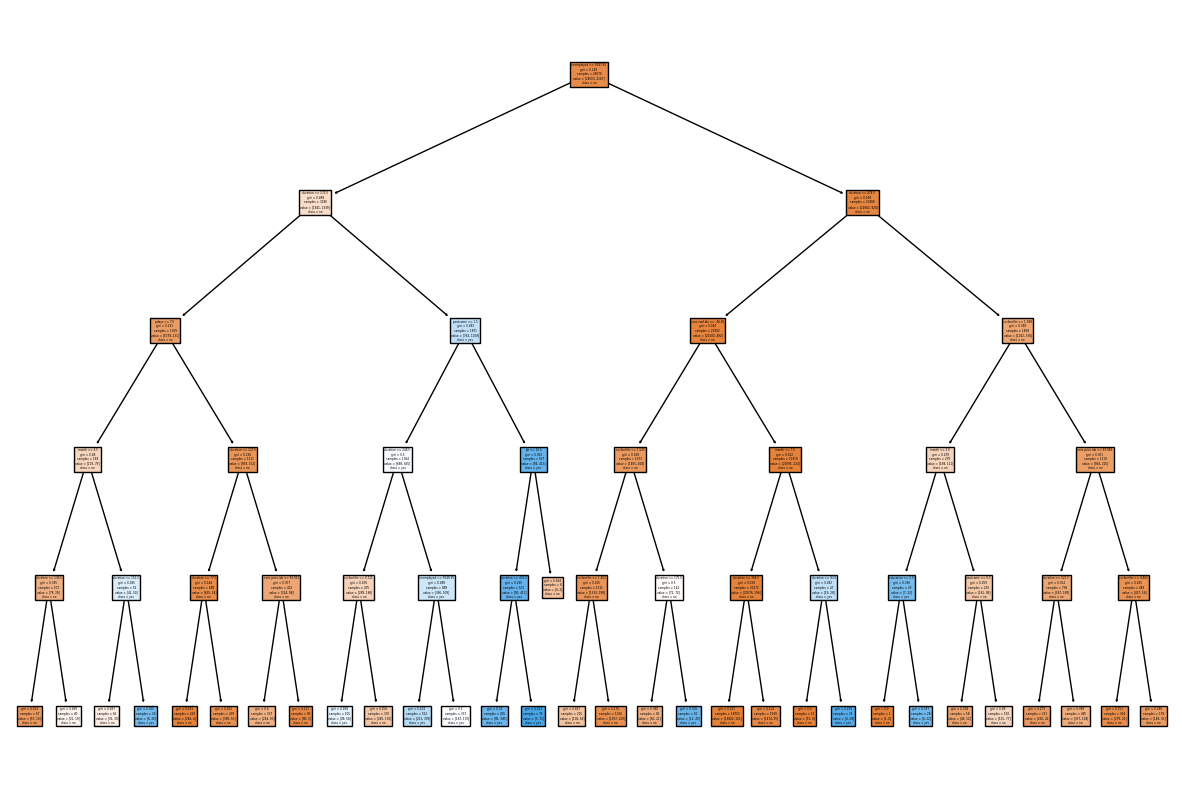

In [21]:
# Plot the Decision Tree
plt.figure(figsize=(15,10))
plot_tree(dt, feature_names=X.columns, class_names=['no', 'yes'], filled=True)
plt.show()


### 12. Build a Decision Tree Using Entropy as Criterion

Training Score: 0.9358080239970004
Testing Score: 0.9399392644246991

Accuracy Score: 0.9399392644246991

Confusion Matrix:
 [[8039  134]
 [ 400  318]]

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.98      0.97      8173
           1       0.70      0.44      0.54       718

    accuracy                           0.94      8891
   macro avg       0.83      0.71      0.76      8891
weighted avg       0.93      0.94      0.93      8891



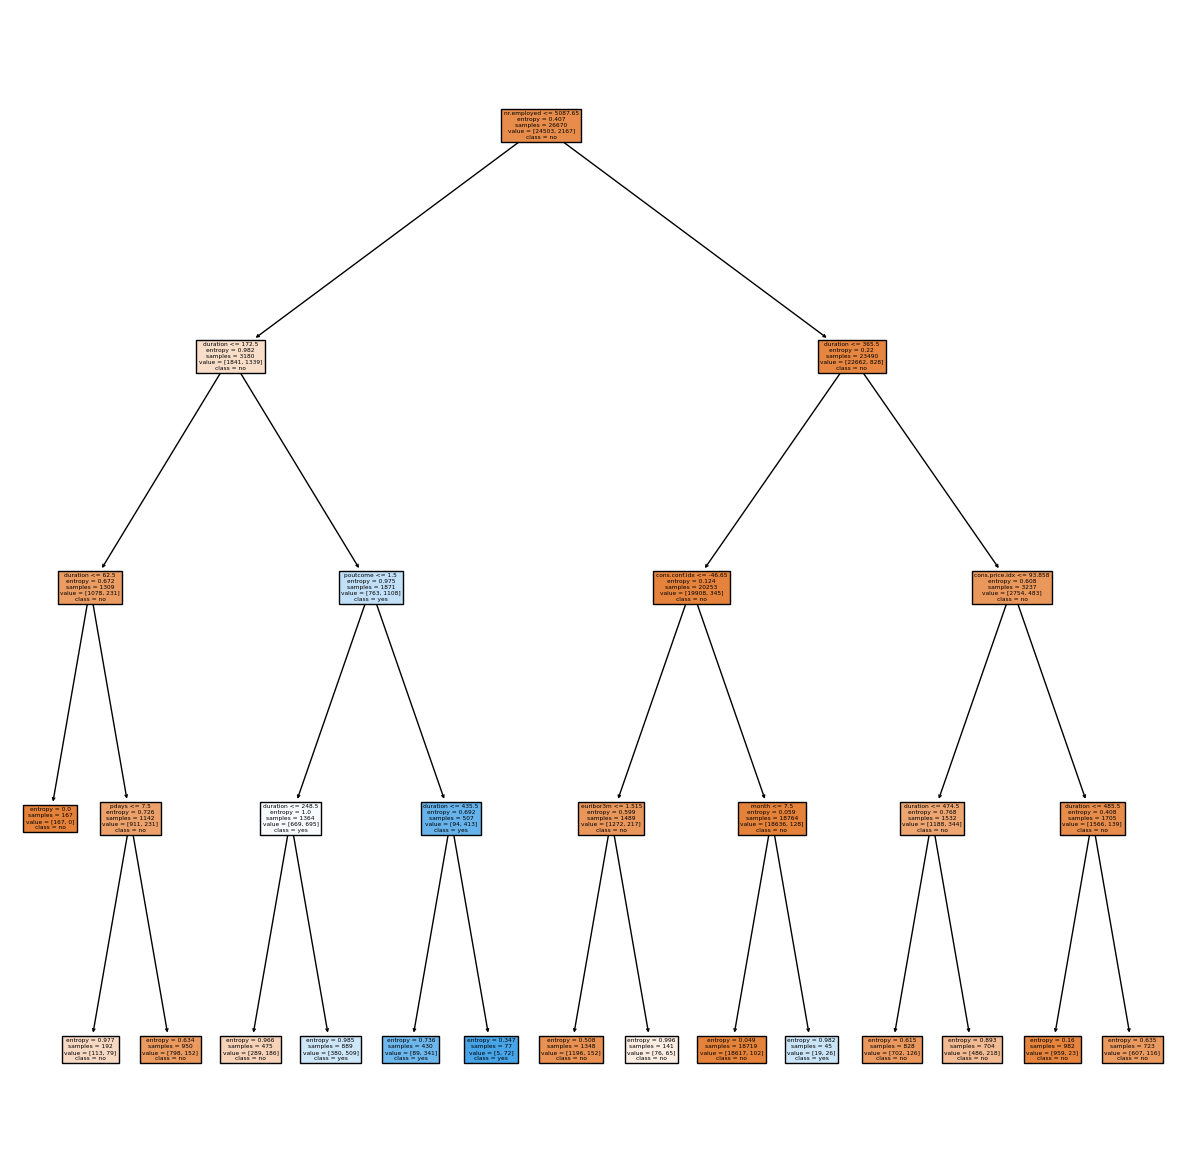

In [22]:
# Initialize and train the Decision Tree Classifier (using Entropy)
dt_entropy = DecisionTreeClassifier(criterion='entropy', max_depth=4, min_samples_split=15, random_state=42)
dt_entropy.fit(X_train, y_train)

# Evaluate the model with entropy criterion
evaluate_model(dt_entropy, X_train, X_test, y_train, y_test)

# Plot the entropy-based decision tree
plt.figure(figsize=(15,15))
plot_tree(dt_entropy, feature_names=X.columns, class_names=['no', 'yes'], filled=True)
plt.show()


# Key Insights from the Decision Tree Classifier Analysis on Bank Marketing Dataset


## 1. Demographic Insights:
- **Age Distribution**: The analysis revealed how age influences the likelihood of customers subscribing to a term deposit. Younger and older age groups may exhibit different behaviors.
- **Job Types**: Different job categories were found to have varying propensities to respond positively to marketing campaigns. Understanding which job types have higher subscription rates can help target marketing efforts.

## 2. Behavioral Insights:
- **Campaign Effectiveness**: The effectiveness of previous marketing campaigns was evaluated based on the number of contacts and subscription rates. A high number of contacts with low conversions may indicate the need for campaign adjustments.
- **Contact Duration**: The duration of contact with customers was found to significantly influence their decision to subscribe. Longer conversations may correlate with higher conversion rates.

## 3. Predictive Performance:
- **Model Accuracy**: The classification accuracy of the Decision Tree model was assessed, indicating how effectively the model predicts customer behavior based on demographic and behavioral features.
- **Confusion Matrix Analysis**: The confusion matrix was analyzed to understand false positives and false negatives, assessing the model's strengths and weaknesses.

## 4. Feature Importance:
- **Critical Features**: The most influential features on the model's predictions were identified, with features like `age`, `campaign`, and `duration` emerging as significant predictors of customer subscriptions.
- **Correlation Analysis**: Correlations among numerical features were checked to identify potential redundancy and improve model efficiency.

## 5. Decision Tree Visualization:
- **Decision Pathways**: Visualizing the decision tree allowed stakeholders to see how decisions are made, illustrating which features lead to positive or negative outcomes.

## 6. Targeted Marketing Strategies:
- **Refining Target Audiences**: The insights can be used to refine marketing strategies, focusing on customer segments most likely to convert.
- **Optimizing Campaigns**: Marketing messages or methods can be adjusted based on the features showing higher success rates (e.g., targeting specific age groups or job types).

## 7. Further Opportunities:
- **Additional Data Sources**: Exploring the incorporation of more features, such as economic indicators or geographic data, could enhance model performance.
- **Model Comparison**: Comparing the Decision Tree model with other algorithms (e.g., Random Forest, Logistic Regression) can help identify the best predictive approach.

## 8. Potential Areas for Improvement:
- **Handling Imbalance**: If the dataset is imbalanced, techniques like SMOTE (Synthetic Minority Over-sampling Technique) could improve model performance.
- **Hyperparameter Tuning**: Experimenting with different hyperparameters of the decision tree could optimize performance further.




Name- Aman Choudhary

Email address- amanchoudhary11189.ac@gmail.com

linkedin Profile- https://www.linkedin.com/in/aman-choudhary-61a9361a0/

Portfolio- https://amanchoudhary1997.github.io/amanchoudhary.github.io/